## Seaborn简介 

> Seaborn是基于matplotlib的图形可视化python包; Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，应该把Seaborn视为matplotlib的补充，而不是替代物

> Seaborn 要求原始数据的输入类型为 pandas 的 Dataframe 或 Numpy 数组，画图函数有以下几种形式
+ sns.图名(x='X轴 列名', y='Y轴 列名', data=原始数据df对象)
+ sns.图名(x='X轴 列名', y='Y轴 列名', hue='分组绘图参数', data=原始数据df对象)
+ sns.图名(x=np.array, y=np.array[, ...])

[seaborn 0.9 中文文档](https://www.cntofu.com/book/172/README.md)  

[Link1](https://www.jianshu.com/p/94931255aede)
[Link2](https://www.jianshu.com/p/23e78cd76a9f?utm_campaign=maleskine&utm_content=note&utm_medium=seo_notes&utm_source=recommendation)

# 直方图 barplot

> 条形图表示具有每个矩形的高度的数值变量的集中趋势的估计，利用条形的高度反映数值变量的集中趋势，在条形顶部还有误差线

## 参数
```python
seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
```

参数 | 描述
:--- | :---
x | 指定label值，可以是一个序列
y | 对应每个label上的数据，可以是一个序列
hue | 指定分类变量
data | 使用的数据集
order | 控制bar绘制的顺序
hue_order | 控制一个bar内每个类绘图顺序
estimator | 统计函数用于估计每个分类中的值, 默认为平均值，可修改为最大值、中位值等
ci | 估计值周围的置信区间大小, 默认为95；若输入的是sd，会跳过bootstrapping的过程，只绘制数据的标准差；若输入的是None，不会执行bootstrapping，而且错误条也不会绘制
n_boot | 计算置信区间需要的 Boostrap 迭代次数
units | 采样单元的标识符，用于执行多级 bootstrap 并解释重复测量设计
orient | 绘图的方向（垂直或水平）
color | 作用于所有元素的颜色，或者渐变色的种子
palette | 不同级别的 hue 变量的颜色
saturation | 原始饱和度与绘制颜色的比例, 取值为[0,1], 大的色块通常在稍微不饱和的颜色下看起来更好
errcolor | 置信区间的线的颜色
errwidth | 误差条的线的宽度
capsize | 设置误差线顶部、底端处横线的显示长度
dodge | 当使用分类参数"hue"时，可以通过dodge参数设置是将不同的类分别用一个bar表示，还是在一个bar上通过不同颜色表示
ax | 指定一个 Axes 用于绘图，如果不指定，则使用当前的 Axes
kwargs | 其他的关键词参数在绘图时通过 plt.bar 传入

## 示例

In [86]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

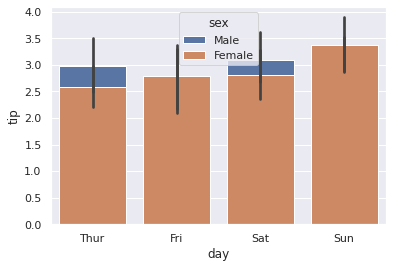

In [94]:
tips = sns.load_dataset('tips')
sns.barplot(x='day', y='tip', hue='sex', dodge=False, data=tips)

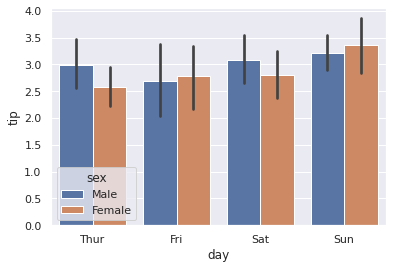

In [92]:
#  dodge 为True，将不同的类分别用一个bar表示

sns.barplot(x='day', y='tip', hue='sex', dodge=True, data=tips)

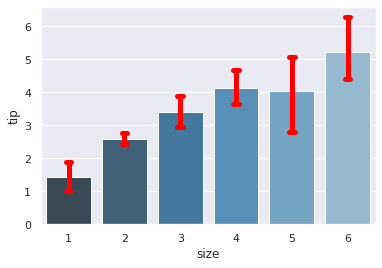

In [98]:
# 用误差条显示平均值的标准误差

sns.barplot(x='size', y='tip', data=tips, palette='Blues_d', ci=95, errcolor='red', errwidth=5, capsize=0.1)

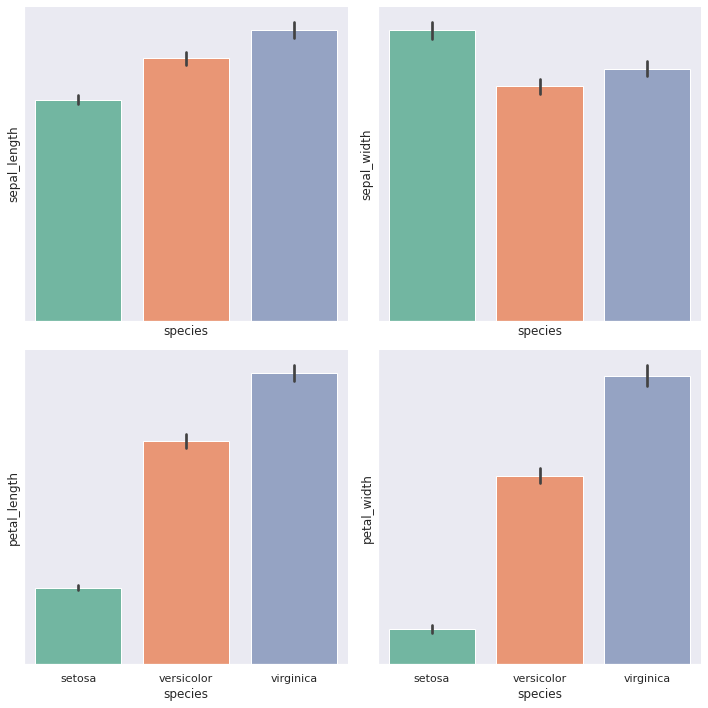

In [64]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.despine(right=True, top=True)

iris = sns.load_dataset('iris')
sns.barplot(x="species", y="sepal_length", data=iris, palette='Set2', ax=axes[0, 0])
sns.barplot(x="species", y="sepal_width", data=iris, palette='Set2', ax=axes[0, 1])
sns.barplot(x="species", y="petal_length", data=iris, palette='Set2', ax=axes[1, 0])
sns.barplot(x="species", y="petal_width", data=iris, palette='Set2', ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

# 分布散点图 stripplot

## 参数
```python
seaborn.stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=False, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)
```
参数 | 描述
:--- | :---
x | 设置分组统计字段
y | 设置分布统计字段
hue | 内部的分类
order | 对`x`参数所选字段内的类别进行排序以及筛选
jitter | float或True; 要应用的抖动量(仅沿分类轴), 当有许多点并且它们重叠时，这可能很有用，因此更容易看到分布; 或者仅使用True作为良好的默认值
dodge | 控制组内分类是否彻底分拆
size | float; 标记的直径
edgecolor | 每个点周围线条的颜色
linewidth | 构图元素的灰线宽度

## 示例

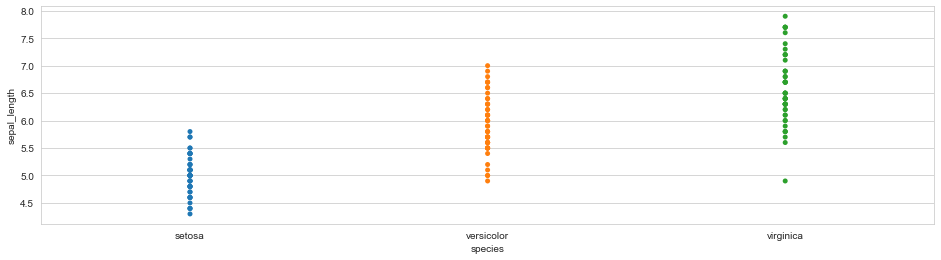

In [39]:
# 加载数据
iris = sns.load_dataset('iris')
iris.dtypes

# 设置画布大小
plt.figure(figsize=(16, 4))

# 设置seaborn样式
sns.set_style("whitegrid")

# 绘制散点图
sns.stripplot(x="species", y="sepal_length", data=iris, jitter=False)

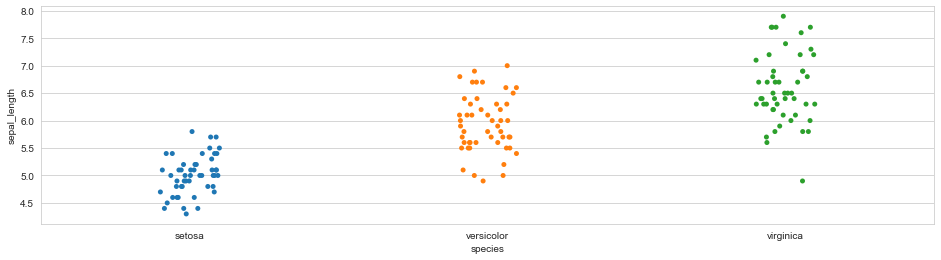

In [38]:
# 通过 jitter 属性为散点图设置抖动，以便更好地观察数据

plt.figure(figsize=(16, 4))
sns.stripplot(x='species', y='sepal_length', data=iris, jitter=True)

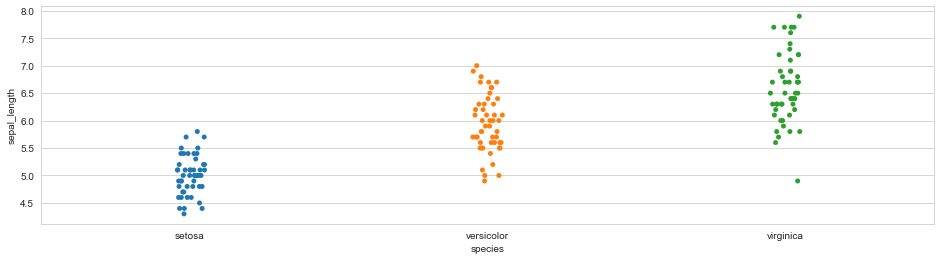

In [40]:
plt.figure(figsize=(16, 4))
sns.stripplot(x='species', y='sepal_length', data=iris, jitter=0.05)

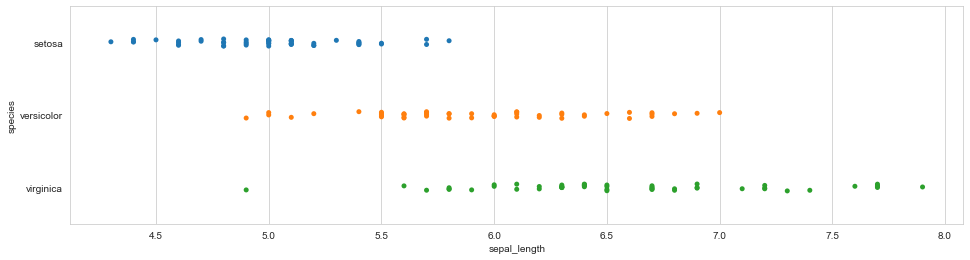

In [41]:
# 改变轴向

plt.figure(figsize=(16, 4))
sns.stripplot(y='species', x='sepal_length', data=iris, jitter=0.05)

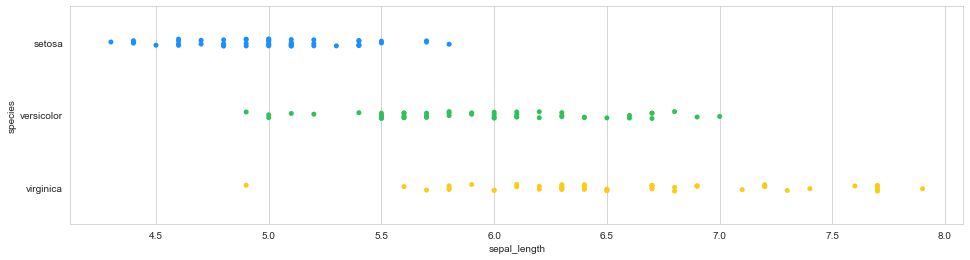

In [42]:
# 改变颜色、样式、大小

plt.figure(figsize=(16, 4))
sns.stripplot(y='species', x='sepal_length', data=iris, jitter=0.05, palette=['#1890FF', '#2FC25B', '#FACC14'])

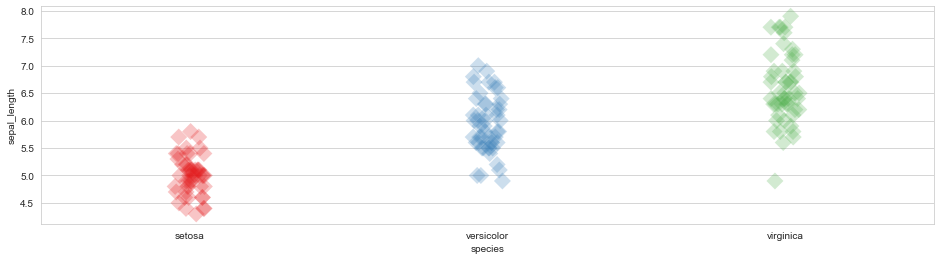

In [45]:
plt.figure(figsize=(16, 4))
sns.stripplot(x='species', y='sepal_length', data=iris, palette='Set1', size=12, 
              marker='D', jitter=0.05, edgecolor='gray', alpha=.25)

# 分簇散点图 swarmplot 

> 也是绘制散点图，但它会通过算法，在类别坐标轴的方向上延展那些原本重合的点，与通过 jitter 属性增加抖动有异曲同工之妙

## 参数
```python
def swarmplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
              dodge=False, orient=None, color=None, palette=None,
              size=5, edgecolor="gray", linewidth=0, ax=None, **kwargs)
```

## 示例

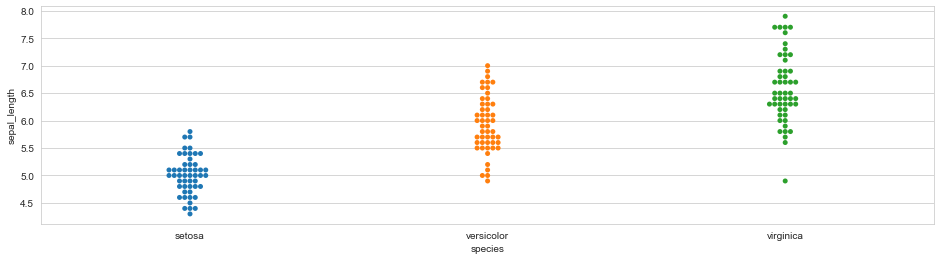

In [46]:
plt.figure(figsize=(16, 4))
sns.swarmplot(x='species', y='sepal_length', data=iris)

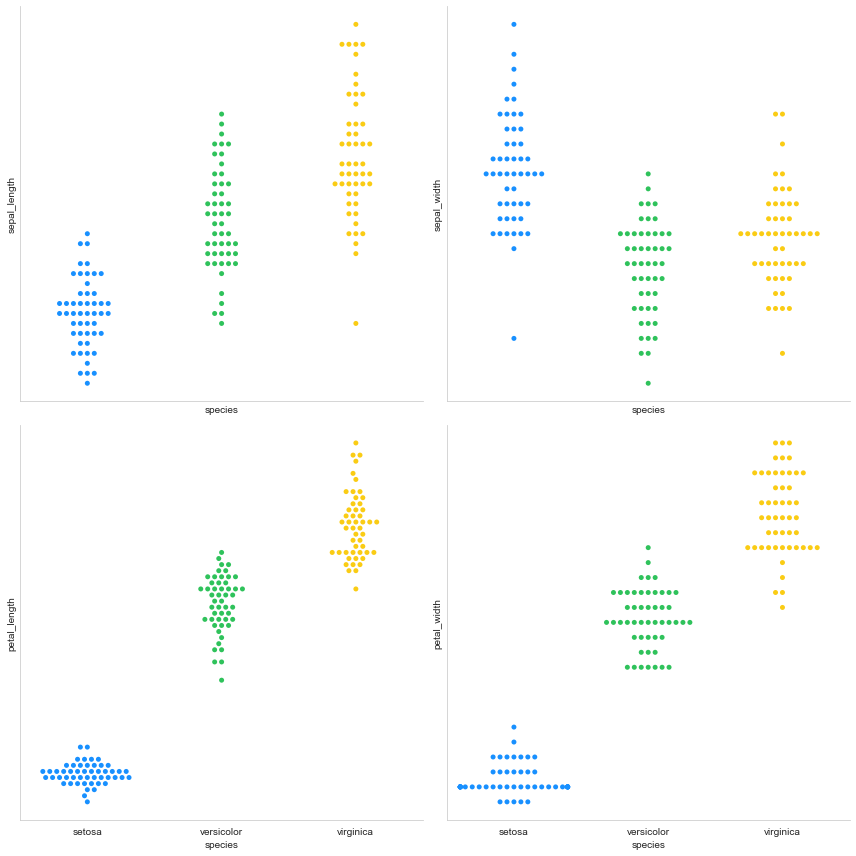

In [51]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.despine(right=True, top=True)

antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864']

sns.swarmplot(x='species', y='sepal_length', data=iris, palette=antV, ax=axes[0, 0])
sns.swarmplot(x='species', y='sepal_width', data=iris, palette=antV, ax=axes[0, 1])
sns.swarmplot(x='species', y='petal_length', data=iris, palette=antV, ax=axes[1, 0])
sns.swarmplot(x='species', y='petal_width', data=iris, palette=antV, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

# 箱型图 boxplot

> 又称为`盒型图`， 通过盒图可以看到数据的最大值、上四分位数Q3、中位数、下四分位数Q1、最小值和异常值的分布

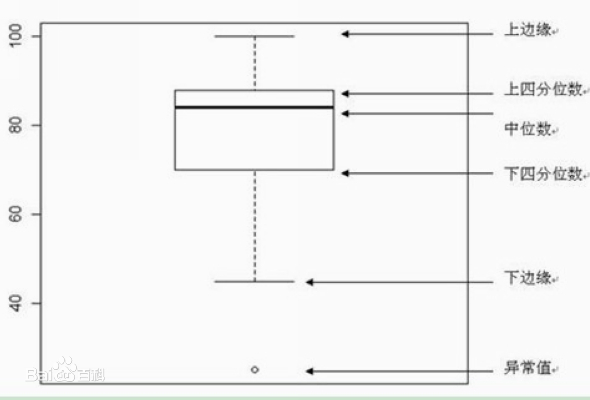

## 参数
```python
def boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
            orient=None, color=None, palette=None, saturation=.75,
            width=.8, dodge=True, fliersize=5, linewidth=None,
            whis=1.5, ax=None, **kwargs):
```

参数 | 描述
:--- | :---
x,y | dataframe中的列名（str）或者矢量数据
hue | dataframe的列名，按照列名中的值分类形成分类的条形图
data | dataframe或者数组
palette | 调色板，控制图像的色调
order, hue_order | 用于控制条形图的顺序
orient | "v","h" 用于控制图像使水平还是竖直显示
fliersize | float，用于指示离群值观察的标记大小
whis | 确定离群值的上下界（IQR超过低和高四分位数的比例），此范围之外的点将被识别为异常值。IQR指的是上下四分位的差值
width | float，控制箱型图的宽度

## 示例

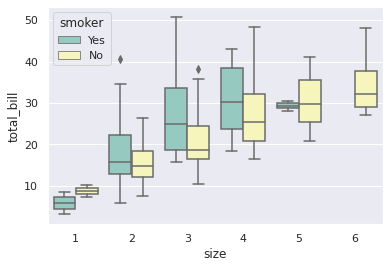

In [102]:
sns.boxplot(x="size", y="total_bill", hue="smoker", data=tips, palette="Set3")

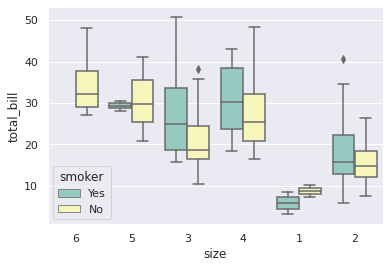

In [106]:
# 通过 order 指定条形图的顺序

sns.boxplot(x="size", y="total_bill", hue="smoker", data=tips, palette="Set3", order=[6, 5, 3, 4, 1, 2])

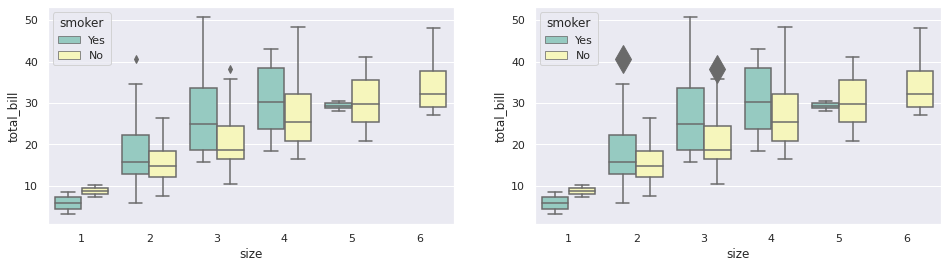

In [118]:
# 设置离群值观察的标记大小

_, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(x="size", y="total_bill", hue="smoker", data=tips, palette="Set3", ax=axes[0])
sns.boxplot(x="size", y="total_bill", hue="smoker", data=tips, palette="Set3", ax=axes[1], fliersize=20)

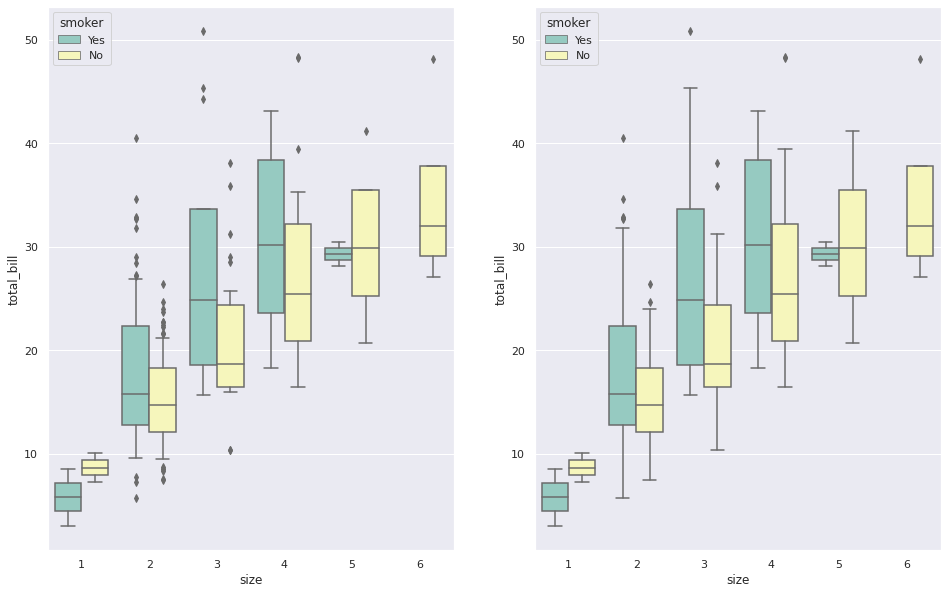

In [126]:
# 确定离群值的上下界

_, axes = plt.subplots(1, 2, figsize=(16, 10))
sns.boxplot(x="size", y="total_bill", hue="smoker", data=tips, palette="Set3", ax=axes[0], whis=0.5)
sns.boxplot(x="size", y="total_bill", hue="smoker", data=tips, palette="Set3", ax=axes[1], whis=1)

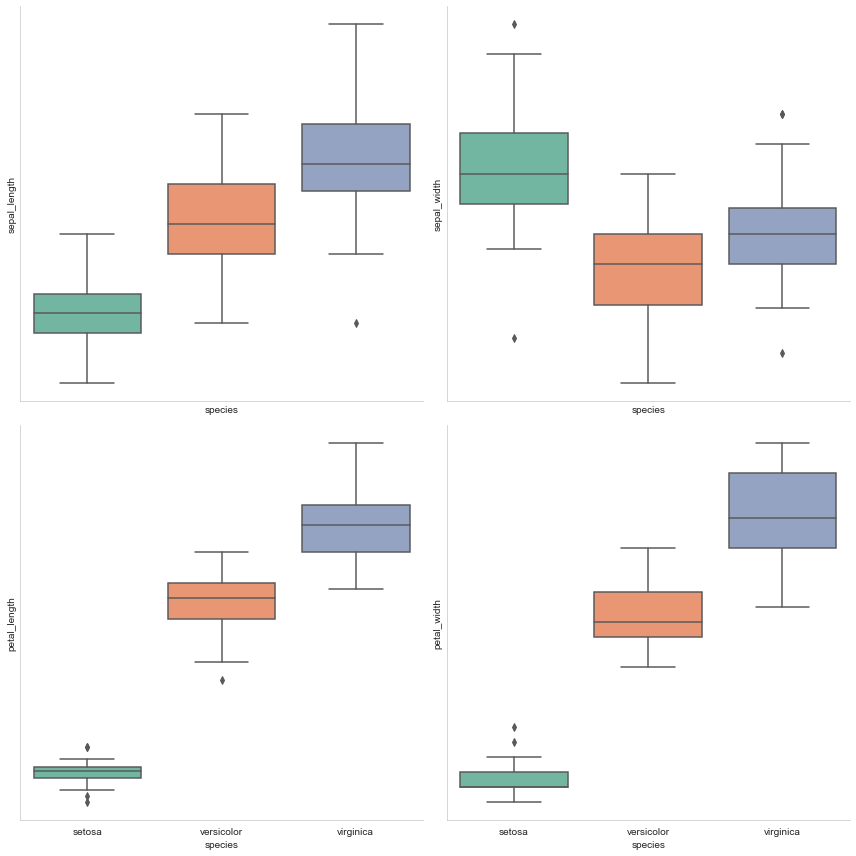

In [53]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.despine(right=True, top=True)

sns.boxplot(x='species', y='sepal_length', data=iris, palette='Set2', ax=axes[0, 0])
sns.boxplot(x='species', y='sepal_width', data=iris, palette='Set2', ax=axes[0, 1])
sns.boxplot(x='species', y='petal_length', data=iris, palette='Set2', ax=axes[1, 0])
sns.boxplot(x='species', y='petal_width', data=iris, palette='Set2', ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

# 小提琴图 violinplot 

> violinplot与boxplot扮演类似的角色，它显示了定量数据在一个（或多个）分类变量的多个层次上的分布，这些分布可以进行比较。不像箱形图中所有绘图组件都对应于实际数据点，小提琴绘图以基础分布的核密度估计为特征

## 参数
```python
def violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
               bw="scott", cut=2, scale="area", scale_hue=True, gridsize=100,
               width=.8, inner="box", split=False, dodge=True, orient=None,
               linewidth=None, color=None, palette=None, saturation=.75,
               ax=None, **kwargs)
```

参数 | 描述
:--- | :---
cut | 以带宽大小为单位，以控制小提琴图外壳延伸超过内部极端数据点的密度。设置为`0`以将小提琴范围限制在观察数据的范围内
scale | 用于缩放每把小提琴的宽度，有'area','count','width'三种方式
scale_hue | 当使用色调变量（hue参数）嵌套小提琴时，此参数确定缩放是在主要分组变量（scale_hue = true）的每个级别内还是在图上的所有小提琴（scale_hue = false）内计算出来的
inner | 控制`violinplot`内部数据点的表示，有'box','quartile','point','stick'四种方式
split | 设置为true则绘制分拆的violinplot以比较经过hue拆分后的两个量

## 示例

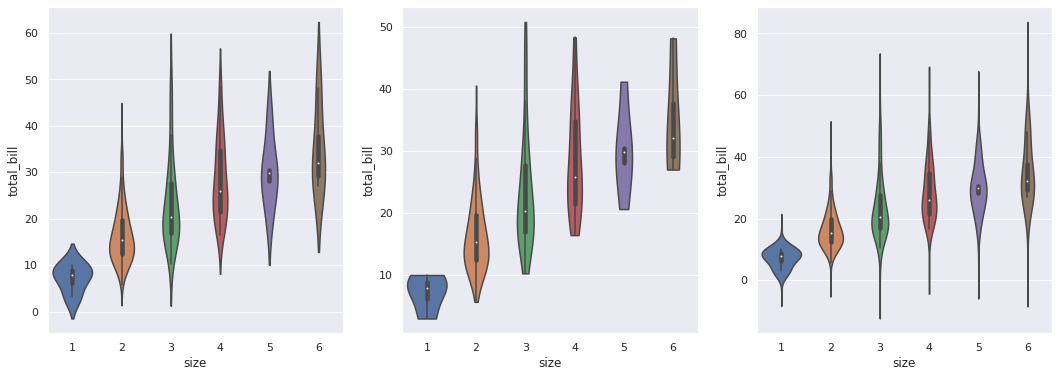

In [133]:
# cut 设置为0以将小提琴范围限制在观察数据的范围内

_, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.violinplot(x='size', y='total_bill', data=tips, ax=axes[0])
sns.violinplot(x='size', y='total_bill', data=tips, ax=axes[1], cut=0)
sns.violinplot(x='size', y='total_bill', data=tips, ax=axes[2], cut=5)

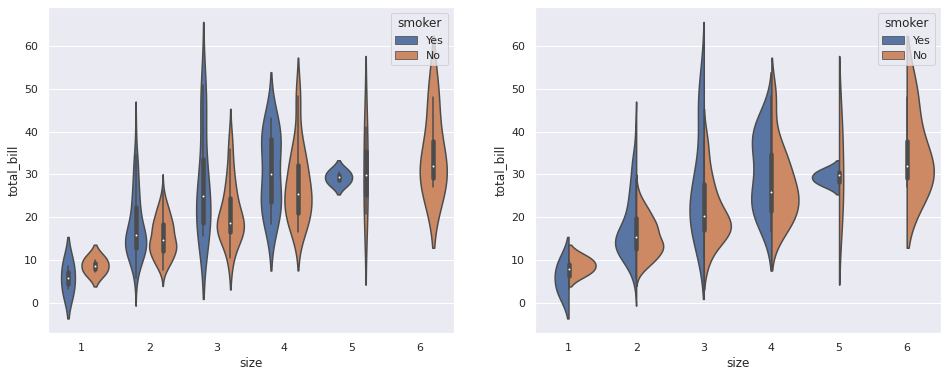

In [134]:
# split 分拆

_, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.violinplot(x='size', y='total_bill', data=tips, hue='smoker', ax=axes[0])
sns.violinplot(x='size', y='total_bill', data=tips, hue='smoker', ax=axes[1], split=True)

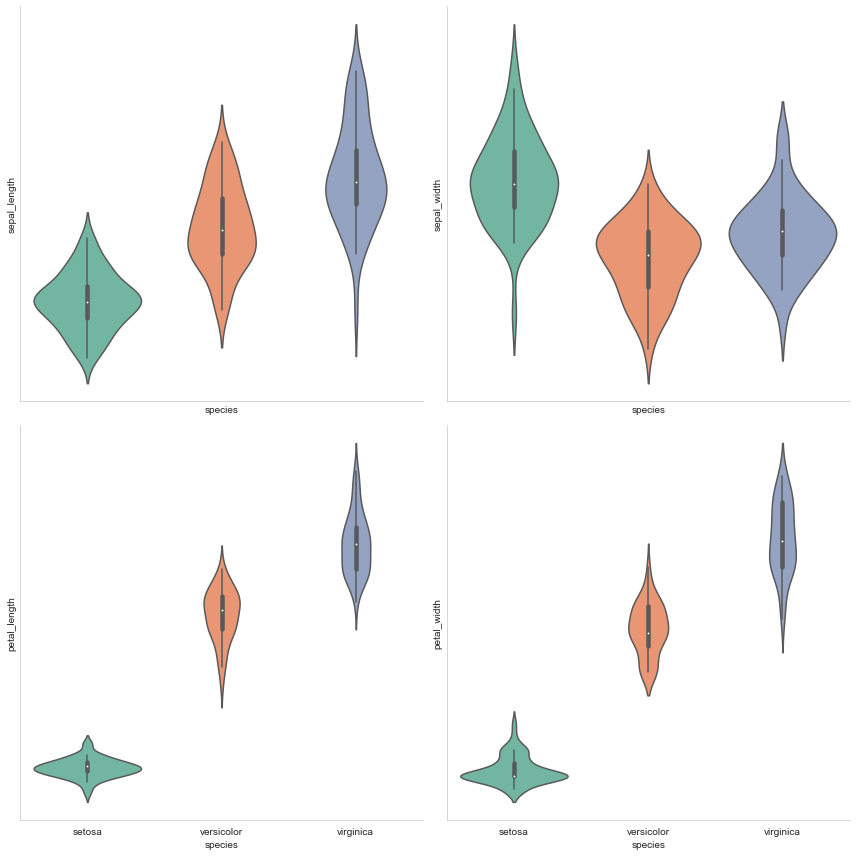

In [54]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.despine(right=True, top=True)

sns.violinplot(x='species', y='sepal_length', data=iris, palette='Set2', ax=axes[0, 0])
sns.violinplot(x='species', y='sepal_width', data=iris, palette='Set2', ax=axes[0, 1])
sns.violinplot(x='species', y='petal_length', data=iris, palette='Set2', ax=axes[1, 0])
sns.violinplot(x='species', y='petal_width', data=iris, palette='Set2', ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

## stripplot 与 boxplot 组合

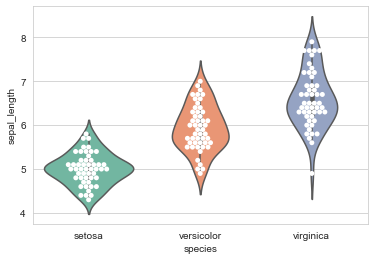

In [55]:
sns.violinplot(x='species', y='sepal_length', data=iris, palette='Set2')
sns.swarmplot(x='species', y='sepal_length', data=iris, color='white', edgecolor='gray')

# 点图 pointplot

> 点图代表散点图位置的数值变量的中心趋势估计，并使用误差线提供关于该估计的不确定性的一些指示。点图可能比条形图更有用于聚焦一个或多个分类变量的不同级别之间的比较。他们尤其善于表现交互作用：一个分类变量的层次之间的关系如何在第二个分类变量的层次之间变化。连接来自相同色调等级的每个点的线允许交互作用通过斜率的差异进行判断，这比对几组点或条的高度比较容易

## 参数
```python
seaborn.pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean>, 
                  ci=95, n_boot=1000, units=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, 
                  orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)
```


## 示例

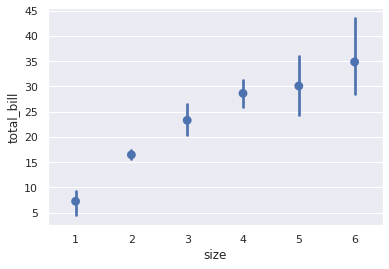

In [137]:
# 图中的点为这组数据的平均值点，竖线则为误差棒，默认两个均值点会相连接，若不想显示，可以通过join参数实现

sns.pointplot(x='size', y='total_bill', data=tips, join=False)

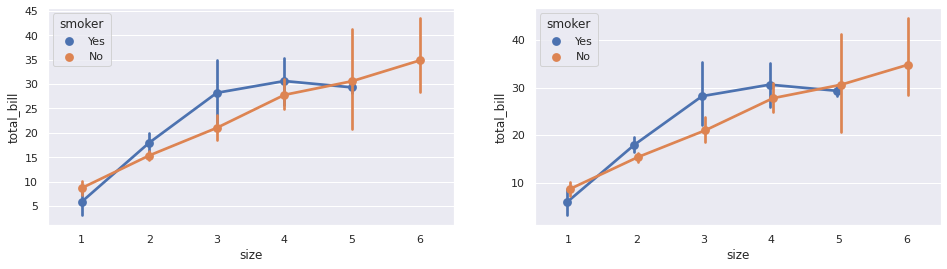

In [141]:
# dodge参数可以使重叠的部分错开

_, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.pointplot(x='size', y='total_bill', data=tips, hue='smoker', ax=axes[0])
sns.pointplot(x='size', y='total_bill', data=tips, hue='smoker', ax=axes[1], dodge=True)

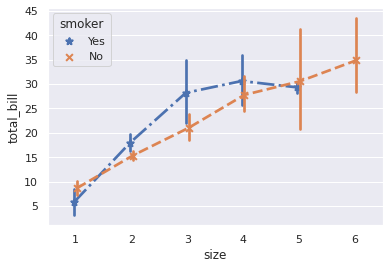

In [143]:
sns.pointplot(x="size", y="total_bill", data=tips, hue="smoker", dodge=True, markers=["*","x"], linestyles=["-.","--"])

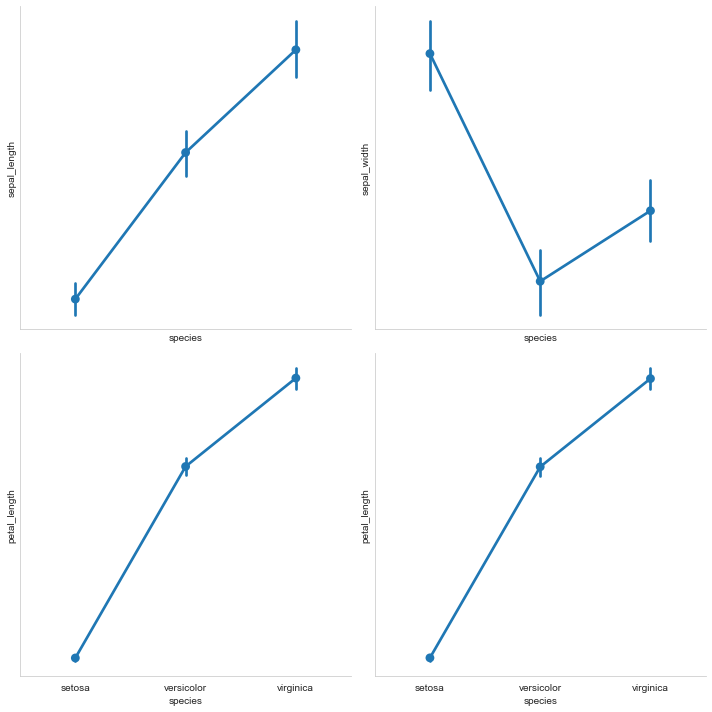

In [58]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.despine(right=True, top=True)

sns.pointplot(x='species', y='sepal_length', data=iris, ax=axes[0, 0])
sns.pointplot(x='species', y='sepal_width', data=iris, ax=axes[0, 1])
sns.pointplot(x='species', y='petal_length', data=iris, ax=axes[1, 0])
sns.pointplot(x='species', y='petal_length', data=iris, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

# 计数图 countplot

> 一个计数图可以被认为是一个分类直方图，而不是定量的变量 (工作原理就是对输入的数据分类，条形图显示各个分类的数量)

## 参数
```python
def countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
              orient=None, color=None, palette=None, saturation=.75,
              dodge=True, ax=None, **kwargs)
```

注意事项：
+ `countplot`中不能同时输入`x`和`y`
+ `countplot`没有误差棒

## 示例

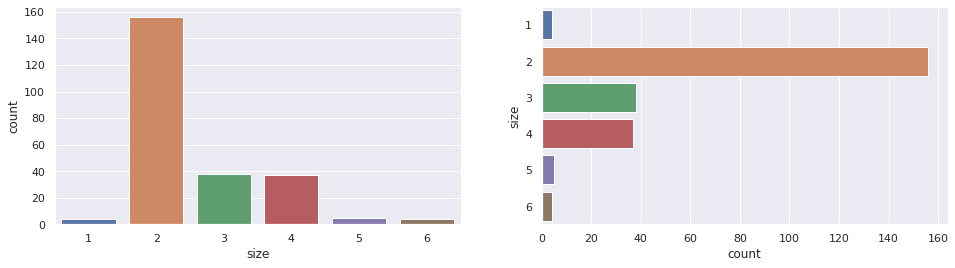

In [145]:
_, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(x='size', data=tips, ax=axes[0])
sns.countplot(y='size', data=tips, ax=axes[1])

# 和密度估计 kdeplot

> 用于对单变量和双变量进行核密度估计并可视化

## 简介 [[link]](http://blog.shaochuancs.com/statistics-kde/)

> 对于大量一维数据的可视化，除了使用直方图(Histogram)，还有一种更好的方法：核密度估计(Kernel Density Estimates，简称KDE)

> 所谓核密度估计，就是采用平滑的峰值函数(“核”)来拟合观察到的数据点，从而对真实的概率分布曲线进行模拟

### KDE 核函数
> 理论上，所有平滑的峰值函数均可作为KDE的核函数来使用，只要对归一化后的KDE而言(描绘在图上的是数据点出现的概率值)，该函数曲线下方的面积和等于1即可 -- 只有一个数据点时，单个波峰下方的面积为1，存在多个数据点时，所有波峰下方的面积之和为1。概而言之，函数曲线需囊括所有可能出现的数据值的情况。

> 核函数特点： 
> + 在数据点处为波峰
> + 曲线下方面积为`1`

> 对于多个数据点的KDE曲线，由于相邻波峰之间会发生波形合成，因此最终所形成的曲线形状与选择的核函数关系并不密切。考虑到函数在波形合成计算上的易用性，一般使用高斯曲线(正态分布曲线)作为KDE的核函数

### 带宽

> 除了核函数，另一个影响KDE的参数是带宽(bw)。带宽反映了KDE曲线整体的平坦程度，也即观察到的数据点在KDE曲线形成过程中所占的比重 
> + 带宽越大，观察到的数据点在最终形成的曲线形状中所占比重越小，KDE整体曲线就越平坦
> + 带宽越小，观察到的数据点在最终形成的曲线形状中所占比重越大，KDE整体曲线就越陡峭

> 带宽的选择很大程度上取决于主观判断：如果认为真实的概率分布曲线是比较平坦的，那么就选择较大的带宽；相反，如果认为真实的概率分布曲线是比较陡峭的，那么就选择较小的带宽

## 参数

```python
def kdeplot(data, data2=None, shade=False, vertical=False, kernel="gau",
            bw="scott", gridsize=100, cut=3, clip=None, legend=True,
            cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None,
            cbar_kws=None, ax=None, **kwargs):
```

参数 | 描述
:--- | :---
data | 一维数组，单变量时作为唯一的变量
data2 | 格式同data，单变量时不输入，双变量作为第2个输入变量
shade | bool型变量，用于控制是否对核密度估计曲线下的面积进行色彩填充，True代表填充
vertical | bool型变量，在单变量输入时有效，用于控制是否颠倒x-y轴位置
kernel | 字符型输入，用于控制核密度估计的方法，默认为'gau'，即高斯核，特别地在2维变量的情况下仅支持高斯核方法
legend | bool型变量，用于控制是否在图像上添加图例
cumulative | bool型变量，用于控制是否绘制核密度估计的累计分布，默认为False
shade_lowest | bool型变量，用于控制是否为核密度估计中最低的范围着色，主要用于在同一个坐标轴中比较多个不同分布总体，默认为True
cbar | bool型变量，用于控制是否在绘制二维核密度估计图时在图像右侧边添加比色卡
color | 字符型变量，用于控制核密度曲线色彩，同plt.plot()中的color参数，如'r'代表红色
cmap | 字符型变量，用于控制核密度区域的递进色彩方案，同plt.plot()中的cmap参数，如'Blues'代表蓝色系
n_levels | int型，在而为变量时有效，用于控制核密度估计的区间个数，反映在图像上的闭环层数

## 示例

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# 分离出setosa类的花对应的属性值
setosa = iris.loc[iris.species == "setosa"].reset_index(drop=True)
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 分离出virginica类的花对应的属性值
virginica = iris.loc[iris.species == 'virginica'].reset_index(drop=True)
virginica.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.3,3.3,6.0,2.5,virginica
1,5.8,2.7,5.1,1.9,virginica
2,7.1,3.0,5.9,2.1,virginica
3,6.3,2.9,5.6,1.8,virginica
4,6.5,3.0,5.8,2.2,virginica


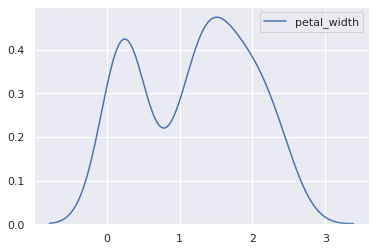

In [5]:
# 绘制iris中petal_width参数的核密度估计图
sns.kdeplot(iris.petal_width)

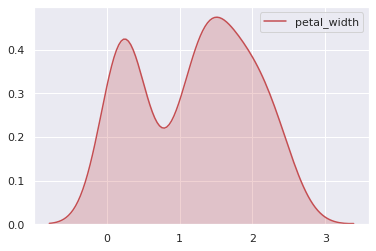

In [6]:
# 加上红色填充颜色，并禁止图例显示
sns.kdeplot(iris.petal_width, shade=True, color='r')

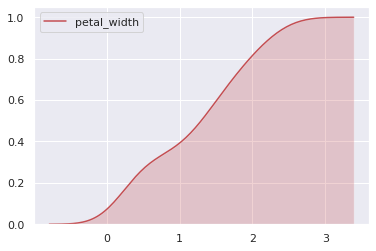

In [7]:
# 修改为核密度累计分布
sns.kdeplot(iris.petal_width, shade=True, color='r', cumulative=True)

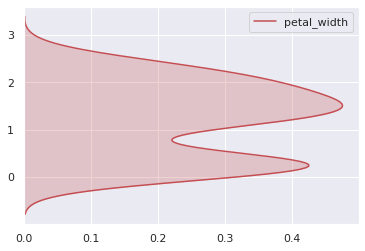

In [8]:
# 交换x-y轴位置
sns.kdeplot(iris.petal_width, shade=True, color='r', vertical=True)

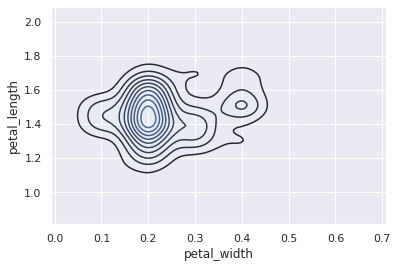

In [9]:
# 绘制双变量联合核密度估计图
sns.kdeplot(setosa.petal_width, setosa.petal_length)

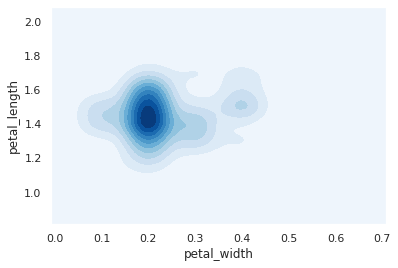

In [10]:
# 修改调色方案为蓝色，并设置shade_lowest=True
sns.kdeplot(setosa.petal_width, setosa.petal_length, cmap='Blues', shade=True, shade_lowest=True)

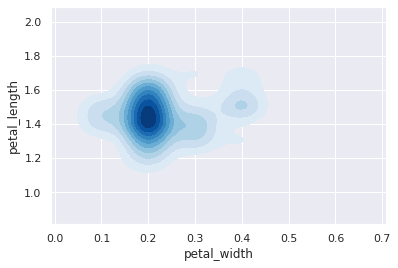

In [11]:
# 设置shade_lowest=True, 可以看到这时最低密度估计曲线之外的区域没有被调色方案所浸染
sns.kdeplot(setosa.petal_width, setosa.petal_length, cmap='Blues', shade=True, shade_lowest=False)

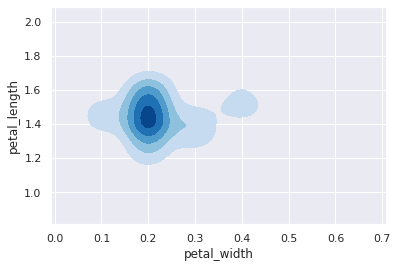

In [12]:
# 将核密度曲线区间个数修改为5
sns.kdeplot(setosa.petal_width, setosa.petal_length, cmap='Blues', shade=True, shade_lowest=False, n_levels=5)

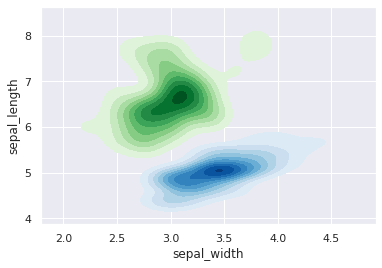

In [13]:
# 在同一个子图中绘制两个不同二维总体的核密度估计图
sns.kdeplot(setosa.sepal_width, setosa.sepal_length, cmap='Blues', shade=True, shade_lowest=False)
sns.kdeplot(virginica.sepal_width, virginica.sepal_length, cmap='Greens', shade=True, shade_lowest=False)

# 一维数据分布 rugplot
> rugplot的功能非常朴素，用于绘制出一维数组中数据点实际的分布位置情况，即不添加任何数学意义上的拟合，单纯的将记录值在坐标轴上表现出来，相对于kdeplot，其可以展示原始的数据离散分布情况

## 参数
```python
def rugplot(a, height=.05, axis="x", ax=None, **kwargs):
```

参数 | 描述
:--- | :---
a | 一维数组，传入观测值向量
height | 设置每个观测点对应的小短条的高度，默认为0.05
axis | 字符型变量，观测值对应小短条所在的轴，默认为'x'，即x轴

# 单变量直方图 distplot
> distplot主要功能是绘制单变量的直方图，且还可以在直方图的基础上施加kdeplot和rugplot的部分内容，是一个功能非常强大且实用的函数

## 参数
```python
def distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None,
             hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None,
             color=None, vertical=False, norm_hist=False, axlabel=None,
             label=None, ax=None):
```

参数 | 描述
:--- | :---
a | 一维数组形式，传入待分析的单个变量
bins | int型变量，用于确定直方图中显示直方的数量，默认为None，这时bins的具体个数由Freedman-Diaconis准则来确定
hist | bool型变量，控制是否绘制直方图，默认为True
kde | bool型变量，控制是否绘制核密度估计曲线，默认为True
rug | bool型变量，控制是否绘制对应rugplot的部分，默认为False
fit | 传入scipy.stats中的分布类型，用于在观察变量上抽取相关统计特征来强行拟合指定的分布，默认为None，即不进行拟合
hist_kws | 接受字典形式的输入，键值对对应原生函数中的参数名称与参数值
kde_kws | 接受字典形式的输入，键值对对应原生函数中的参数名称与参数值
rug_kws | 接受字典形式的输入，键值对对应原生函数中的参数名称与参数值
color | 用于控制除了fit部分拟合出的曲线之外的所有对象的色彩
vertical | bool型，控制是否颠倒x-y轴，默认为False，即不颠倒
norm_hist | bool型变量，用于控制直方图高度代表的意义，为True直方图高度表示对应的密度，为False时代表的是对应的直方区间内记录值个数，默认为False
label | 控制图像中的图例标签显示内容

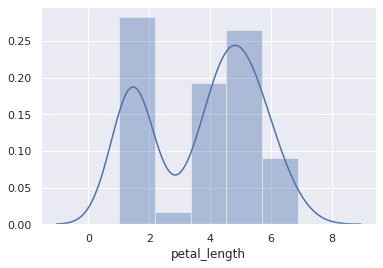

In [24]:
# 使用默认参数进行绘制
sns.distplot(iris.petal_length)

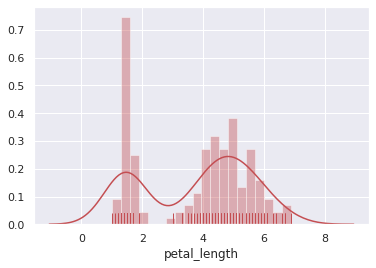

In [25]:
# 修改所有对象的颜色，绘制rugplot部分，并修改bins为20
sns.distplot(iris.petal_length, color='r', rug=True, bins=20)

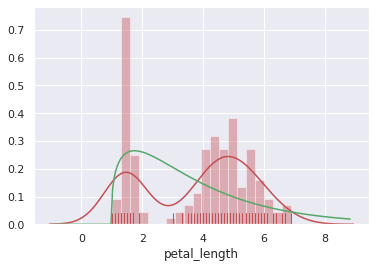

In [26]:
# 在上图的基础上强行拟合卡方分布并利用参数字典设置fit曲线为绿色
from scipy.stats import chi2
sns.distplot(iris.petal_length, color='r', rug=True, bins=20, fit=chi2, fit_kws={"color" : 'g'})

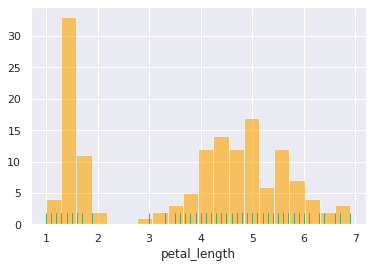

In [27]:
# 修改norm_hist参数为False使得纵轴显示的不再是密度而是频数（注意这里必须关闭kde和fit绘图的部分，否则纵轴依然显示密度）
# 利用hist_kws传入字典调整直方图部分色彩和透明度
# 利用rug_kws传入字典调整rugplot部分小短条色彩
sns.distplot(iris.petal_length, color='r', rug=True, kde=False, bins=20, fit=None, 
             hist_kws={"alpha": 0.6, 'color': 'orange'}, rug_kws={'color' : 'g'}, norm_hist=False)

# 双变量关系图 jointplot

> 用于对成对变量的相关情况、联合分布以及各自的分布在一张图上集中呈现

## 参数
```python
def jointplot(x, y, data=None, kind="scatter", stat_func=None,
              color=None, height=6, ratio=5, space=.2,
              dropna=True, xlim=None, ylim=None,
              joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs):
```

参数 | 描述
:--- | :---
x,y | 代表待分析的成对变量，有两种模式，第一种模式：在参数data传入数据框时，x、y均传入字符串，指代数据框中的变量名；第二种模式：在参数data为None时，x、y直接传入两个一维数组，不依赖数据框
data | 与上一段中的说明相对应，代表数据框，默认为None
kind | 字符型变量，用于控制展示成对变量相关情况的主图中的样式，{"scatter"| "reg"| "resid"| "kde"| "hex"}
color | 控制图像中对象的色彩
height | 控制图像为正方形时的边长
ratio | int型，调节联合图与边缘图的相对比例，越大则边缘图越矮，默认为5
space | int型，用于控制联合图与边缘图的空白大小
xlim,ylim | 设置x轴与y轴显示范围
joint_kws,marginal_kws,annot_kws | 传入参数字典来分别精细化控制每个组件

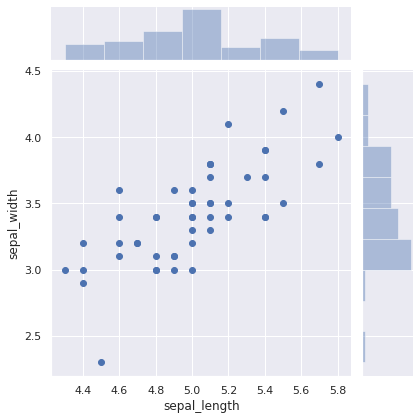

In [28]:
# 在默认参数设置下绘制成对变量联合图
sns.jointplot(x='sepal_length', y='sepal_width', data=setosa)

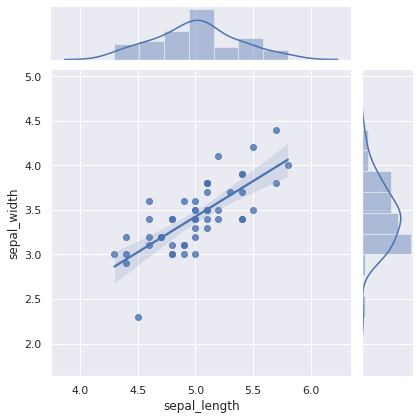

In [29]:
# 将kind参数设置为'reg'，为联合图添加线性回归拟合直线与核密度估计结果
sns.jointplot(x='sepal_length', y='sepal_width', data=setosa, kind='reg')

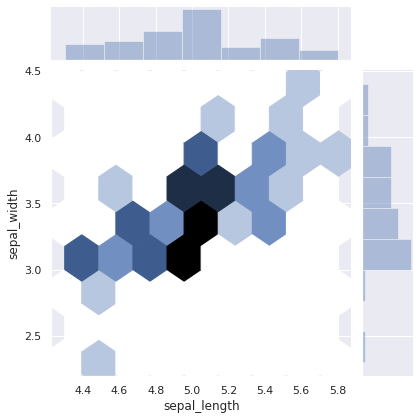

In [30]:
# 修改kind为'hex'来为联合图生成六边形核密度估计
sns.jointplot(x='sepal_length', y='sepal_width', data=setosa, kind='hex')

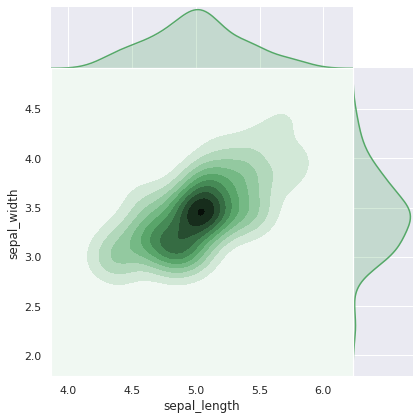

In [31]:
# 修改kind为'kde'来将直方图和散点图转换为核密度估计图，并将边际轴的留白大小设定为0
sns.jointplot(x='sepal_length', y='sepal_width', data=setosa, kind='kde', space=0, color='g')

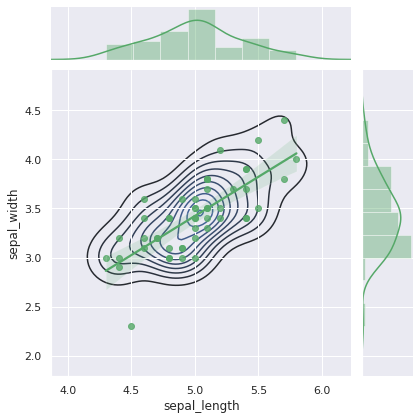

In [32]:
# jointplot还支持图层叠加，先绘制出的联合图中kind限制为拟合线性回归直线，在此基础上利用plot_joint方法叠加核密度估计图层
(sns.jointplot(x='sepal_length', y='sepal_width', data=setosa, color='g', kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=10)

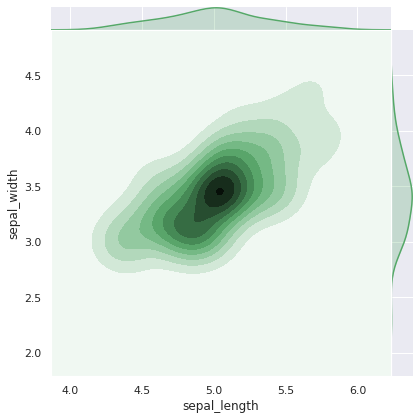

In [33]:
# 调大ratio参数使得边缘图更加小巧
sns.jointplot(x='sepal_length', y='sepal_width', data=setosa, kind='kde', space=0, color='g', ratio=15)

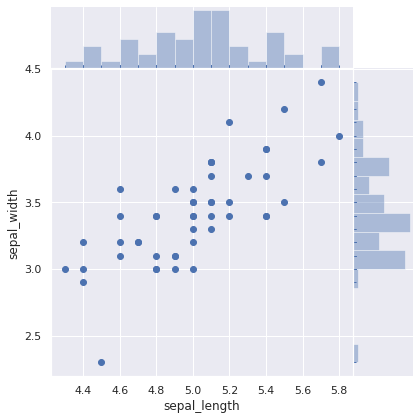

In [34]:
# 利用边缘图形参数字典为边缘图形添加rugplot的内容，并修改直方个数为15
sns.jointplot(x='sepal_length', y='sepal_width', data=setosa, marginal_kws=dict(bins=15, rug=True), linewidth=1, space=0)

# 多绘图网格 FacetGrid

> 在数据集的子集中分别可视化变量的分布或多个变量之间的关系

> 一个FacetGrid可以多达三个维度：row，col，和hue。前两个与轴阵列有明显的对应关系; 将色调变量视为沿深度轴的第三个维度，其中不同的级别用不同的颜色绘制。通过使用`FacetGrid`数据框初始化对象以及将形成网格的行，列或色调维度的变量名称来使用该类。这些变量应该是分类的或离散的，然后变量的每个级别的数据将用于沿该轴的小平面

> 

## 数据准备
> 数据必须位于Pandas DataFrame中，并且必须采用“整洁”数据的形式。简而言之，这意味着数据框应该构造成每列都是一个变量，每一行都是一个观察点

## 基本工作流程
+ `FacetGrid` 使用数据集和用于构造网格的变量初始化对象
+ 通过调用`FacetGrid.map()` 或将一个或多个绘图函数应用于每个子集`FacetGrid.map_dataframe()`
+ 使用其他方法调整绘图，以执行更改轴标签，使用不同刻度或添加图例等操作

## 参数
```python
def seaborn.FacetGrid(self, data, row=None, col=None, hue=None, col_wrap=None,
                 sharex=True, sharey=True, height=3, aspect=1, palette=None,
                 row_order=None, col_order=None, hue_order=None, hue_kws=None,
                 dropna=True, legend_out=True, despine=True,
                 margin_titles=False, xlim=None, ylim=None, subplot_kws=None,
                 gridspec_kws=None, size=None):
```

参数 | 描述
:--- | :---
data | 类型：DataFrame; 处理后的（“整洁格式”）dataframe数据，其中每一列都是一个变量（特征），每一行都是一个样本
row,col,hue | 类型：string; 定义数据子集的变量，这些变量将在网格的不同方面绘制
col_wrap | 类型：int; 网格列维度限制，比如col_wrap =3，那么在这个画布里最多只能画3列
sharex,sharey | 类型：bool; 是否共享`x`轴或者`y`轴
height | 每个图片的高度设定，默认为3
aspect | 纵横比，每个小图的横轴长度和纵轴的比; 默认为1，即等高等宽
palette | 一般在使用hue时用来改变颜色的，系统提供的可选值有: deep, muted, bright, pastel, dark, colorblind
(row,col,hue)\_order | 对所给命令的级别进行排序。默认情况下，这将是数据中显示的级别，如果变量是pandas分类，则是类别顺序
hue_kws | 传入参数字典用来精细化控制组件
legend_out | 如果True，图形尺寸将被扩展，并且图例将被绘制在中心右侧的图形之外; 为假时，图例单独放出来
despine | 从图中移除顶部和右侧脊柱, 就是边缘框架
margin_titles | 如果是真的，那么行变量的标题就会被绘制到最后一列的右边。这个选项是实验性的，在所有情况下都可能不起作用
(x,y)\_lim | 每个方面的每个轴的限制
subplot_kws | 传递给 matplotlib的`subplots` 方法的关键字参数字典
gridspec_kws | 传递给 matplotlib的`gridspec` 模块的关键字参数的字典

## 方法

方法 | 描述
:--- | :---
add_legend([legend_data，title，label_order]) | 绘制一个图例，可能将其放在轴外并调整图形大小
despine(\*\*kwargs) | 从小平面上移除轴刺
facet_axis(row_i，col_j) | 使这些索引识别的轴处于活动状态并返回
facet_data() | 生成器用于每个方面的名称索引和数据子集
map(func，\*args，\*\*kwargs) | 将绘图功能应用于每个方面的数据子集
savefig(\*args，\*\*kwargs) | 保存图
set(\*\*kwargs) | 在每个子图集Axes上设置属性
set_axis_labels([x_var，y_var]) | 在网格的左列和底行设置轴标签
set_title([template，row_template，...]) | 在每个构面上方或网格边距上绘制标题
set_xlabels([label]) | 在网格的底行标记x轴
set_xticklabels([labels, step]) | 在网格的底行设置x轴刻度标签
set_ylabels([label]) | 在网格的左列标记y轴
set_yticklabels([labels]) | 在网格的左列上设置y轴刻度标签

In [35]:
sns.set(style='darkgrid')

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


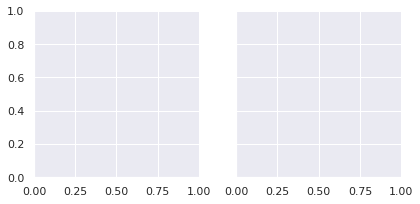

In [39]:
# 初始化网格会设置matplotlib图形和轴，但不会在它们上绘制任何内容
g = sns.FacetGrid(tips, col='time')

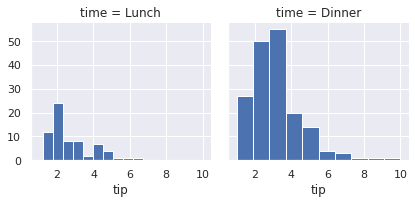

In [40]:
# 在网格上可视化数据的主要方法是使用该 FacetGrid.map() 方法。
# def map(self, func, *args, **kwargs)

g = sns.FacetGrid(tips, col='time')
g.map(plt.hist, 'tip')

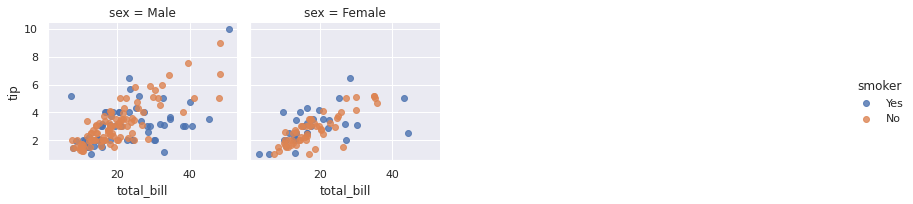

In [43]:
# 要创建关系图，只需传递多个变量名称

g = sns.FacetGrid(tips, col='sex', hue='smoker', col_wrap=2)
g.map(plt.scatter, "total_bill", "tip", alpha=0.8)
g.add_legend()

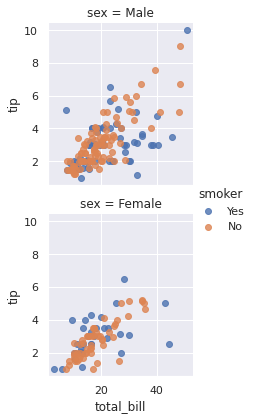

In [44]:
# 此时col_wrap=1，说明col_wrap是限制网格中图的列的个数的

g = sns.FacetGrid(tips, col='sex', hue='smoker', col_wrap=1)
g.map(plt.scatter, "total_bill", "tip", alpha=0.8)
g.add_legend()

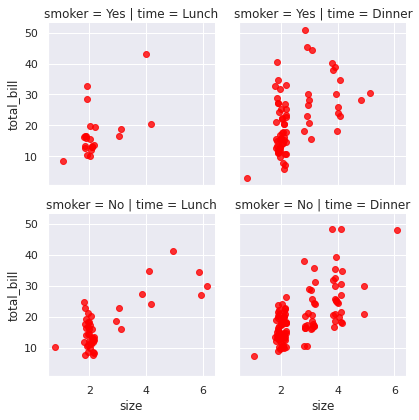

In [48]:
# g = sns.FacetGrid(tips, row='smoker', col='time', margin_titles=False)
g = sns.FacetGrid(tips, row='smoker', col='time')
g.map(sns.regplot, 'size', 'total_bill', color='red', fit_reg=False, x_jitter=0.2)

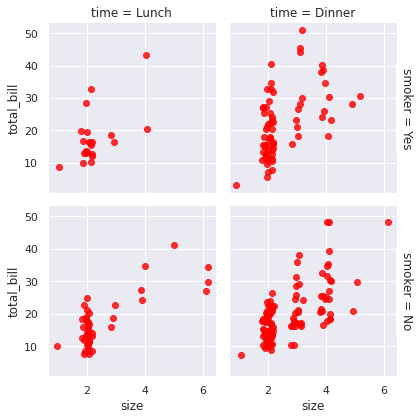

In [50]:
g = sns.FacetGrid(tips, row='smoker', col='time', margin_titles=True)
g.map(sns.regplot, 'size', 'total_bill', color='red', fit_reg=False, x_jitter=0.2)

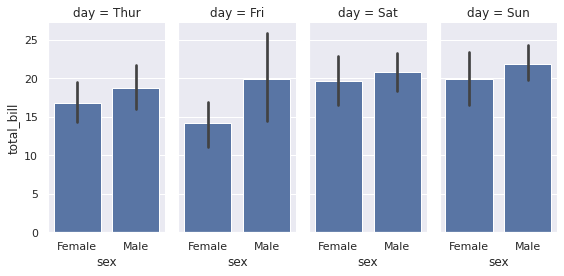

In [56]:
# 通过 height、aspect提供每个面的高度以及纵横比来设置图形的大小

g = sns.FacetGrid(tips, col='day', height=4, aspect=0.5)
g.map(sns.barplot, 'sex', 'total_bill', order=['Female', 'Male'])

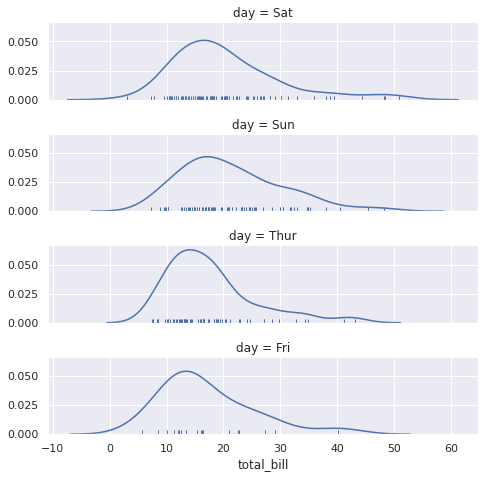

In [58]:
# facet的默认排序源自DataFrame中的信息。如果用于定义构面的变量具有分类类型，则使用类别的顺序
# 否则，facet将按照类别级别的出现顺序排列
# 但是，可以使用适当的 *_order 参数指定任何构面尺寸的顺序

ordered_days = tips['day'].value_counts().index
g = sns.FacetGrid(tips, row='day', row_order=ordered_days, height=1.7, aspect=4)
g.map(sns.distplot, 'total_bill', hist=False, rug=True)

# 成对数据关系 PairGrid

> 可用于绘制展现数据集内多个变量之间关系的矩阵图，在一个PairGrid中，每个行和列都分配给不同的变量，因此结果图显示数据集中的每个成对关系

> 该类的基本用法非常相似FacetGrid。首先初始化网格，然后将绘图函数传递给map方法，并在每个子图上调用它

## 参数
```python
PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)
```

## 示例

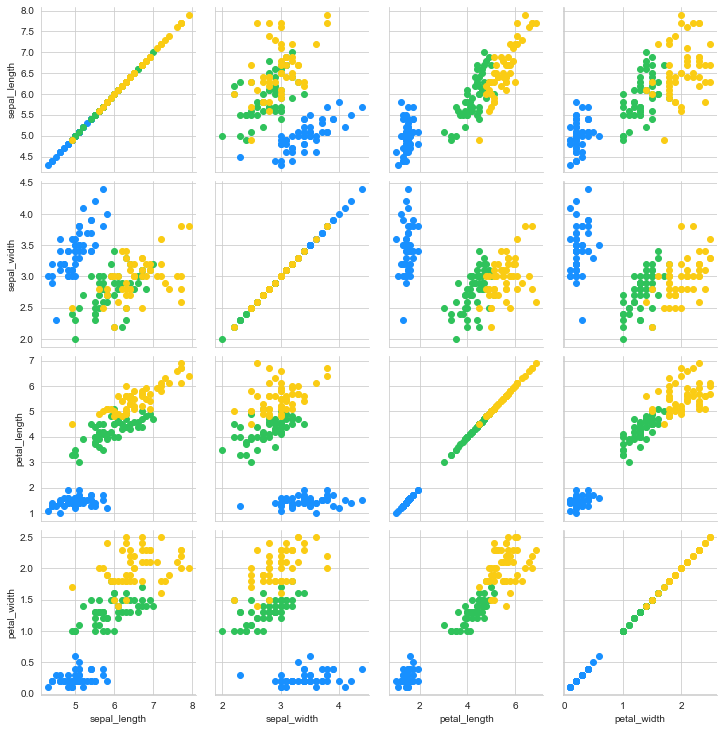

In [62]:
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864']
g = sns.PairGrid(data=iris, palette=antV, hue='species')
g.map(plt.scatter)

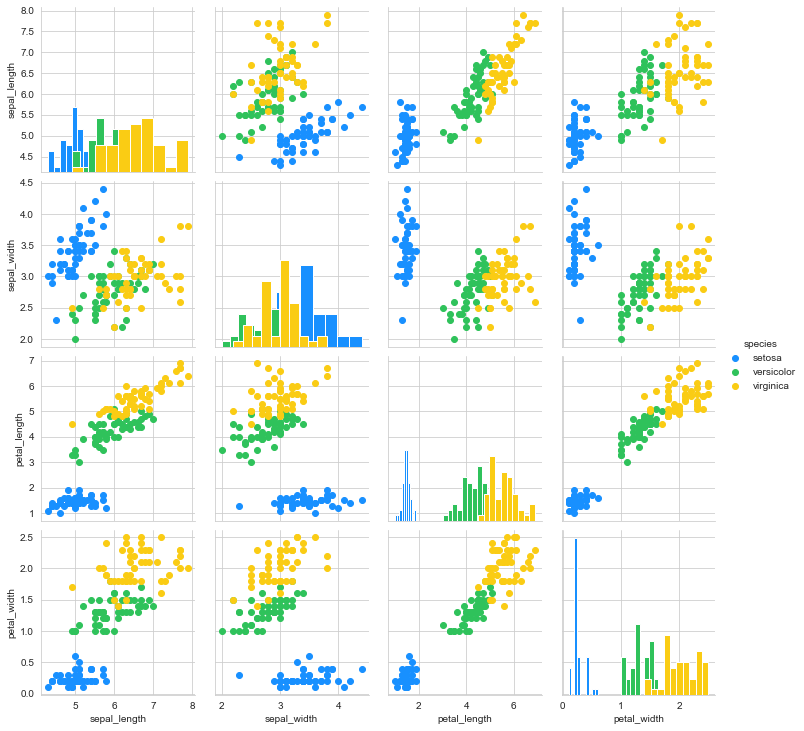

In [63]:
# 可以在对角线上绘制不同的函数，以显示每列中变量的单变量分布

g = sns.PairGrid(data=iris, palette=antV, hue='species')
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

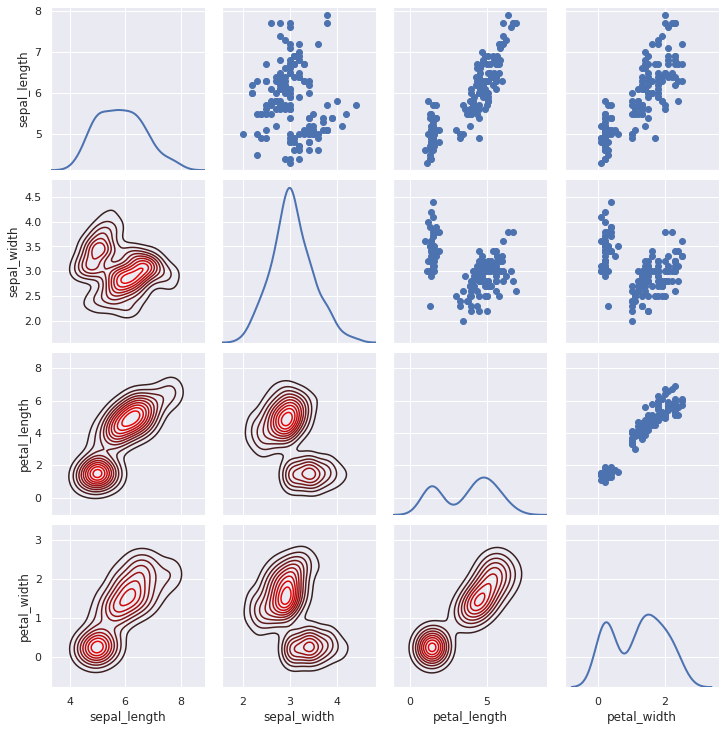

In [61]:
# 可以在上三角和下三角中使用不同的函数来强调关系的不同方面

g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, color='red')
g.map_diag(sns.kdeplot, linewidth=2, legend=False)

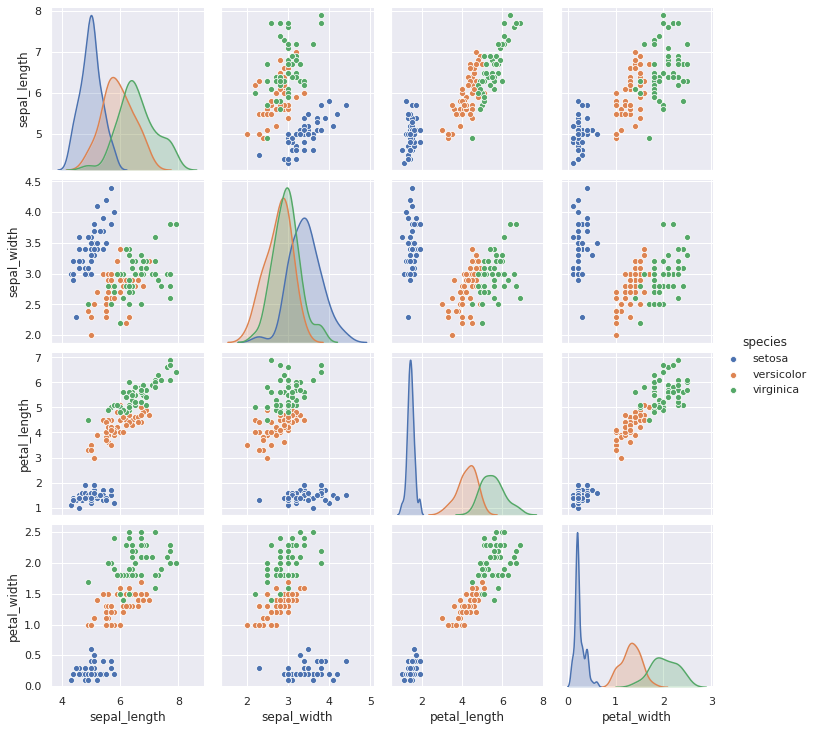

In [62]:
# 要快速查看数据集，使用pairplot()可以更容易
# 此功能默认使用散点图和直方图，但会添加一些其他类型

sns.pairplot(iris, hue="species", height=2.5)

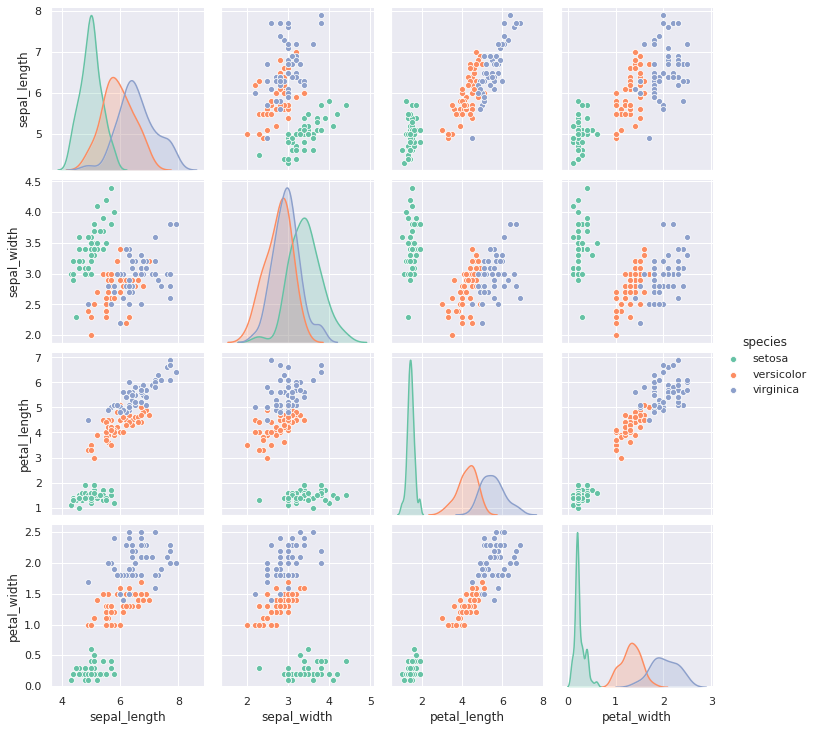

In [63]:
# 还可以使用关键字参数控制绘图的美学，并返回PairGrid实例以进行进一步调整

sns.pairplot(iris, hue='species', palette='Set2', diag_kind='kde', height=2.5)

## 示例

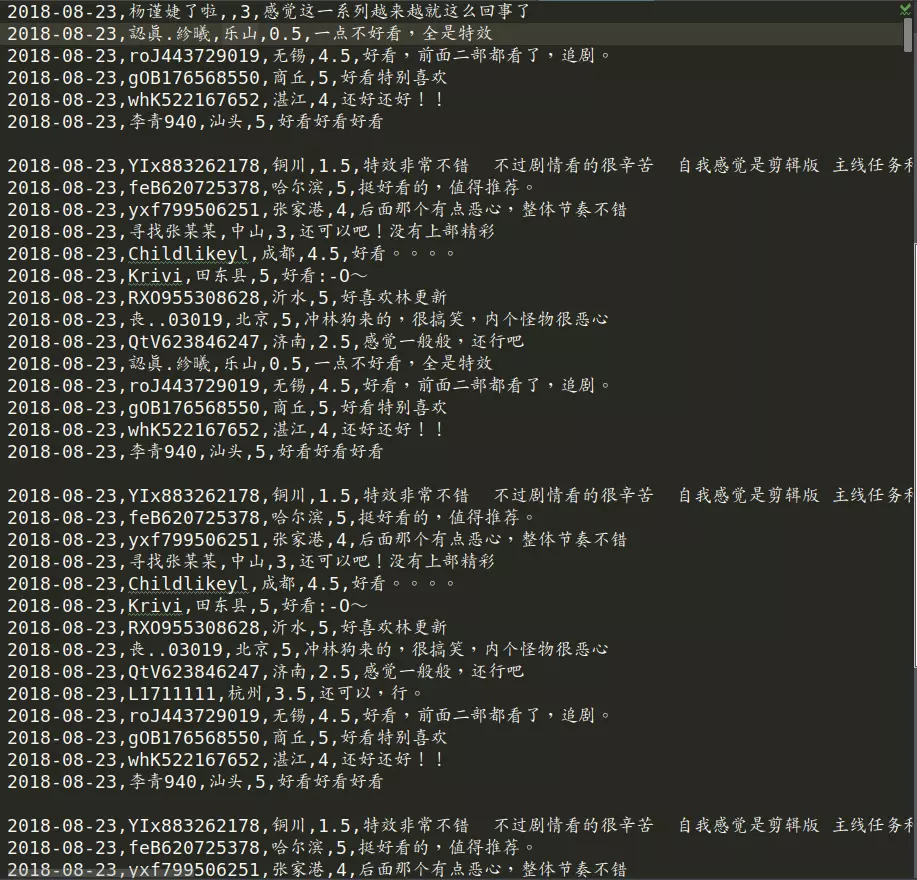

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

f = open('狄仁杰.txt',encoding='UTF-8')
data = pd.read_csv(f, sep=',', header=None, encoding='UTF-8', names=['date','nickname','city','rate','comment'])

#评分分析
rate = data['rate'].value_counts()
sns.set_style("darkgrid")
bar_plot = sns.barplot(x=(rate.index), y=(rate.values/sum(rate)),palette="muted")
plt.xticks(rotation=90)
plt.show()